In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
#Loading the data from a csv file
df=pd.read_csv("mail_data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.loc[df['Category']=='spam', 'Category',]=0
df.loc[df['Category']=='ham', 'Category',]=1
df['Category']=df['Category'].astype('int')

In [5]:
#Checking the shape
df.shape

(5572, 2)

In [6]:
#checking for duplicated values
df.duplicated().sum()

415

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df['Category'].value_counts()

1    4516
0     641
Name: Category, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

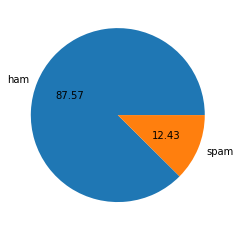

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham', 'spam'],autopct="%0.2f")
plt.show

In [ ]:
# Here the Data is imbalaced

In [10]:
df['text_characters']=df['Message'].apply(len)
df.head()

,Category,Message,text_characters
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
import nltk

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df['No of Words']=df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,Category,Message,text_characters,No of Words
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
df['No of sentences']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,text_characters,No of Words,No of sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [15]:
df[['text_characters','No of Words', "No of sentences"]].describe()

,text_characters,No of Words,No of sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
#ham
df[df['Category']==1][['text_characters','No of Words', "No of sentences"]].describe()

,text_characters,No of Words,No of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [21]:
#spam
df[df['Category']==0][['text_characters','No of Words', "No of sentences"]].describe()

,text_characters,No of Words,No of sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [18]:
import seaborn as sns

<AxesSubplot:xlabel='No of Words', ylabel='Count'>

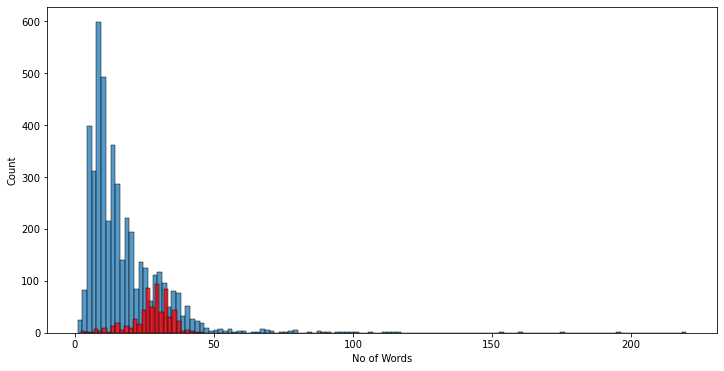

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==1]['No of Words'])
sns.histplot(df[df['Category']==0]['No of Words'],color='red')


<AxesSubplot:xlabel='text_characters', ylabel='Count'>

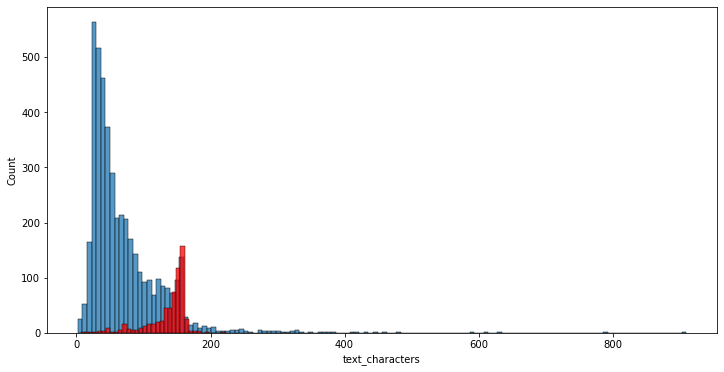

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==1]['text_characters'])
sns.histplot(df[df['Category']==0]['text_characters'],color='red')

<AxesSubplot:>

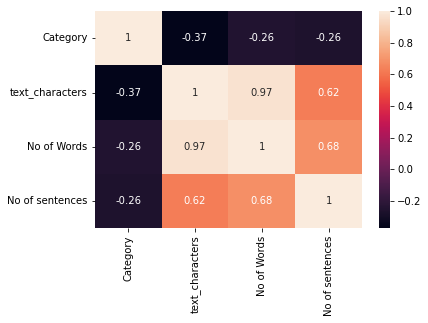

In [94]:
sns.heatmap(df.corr(),annot=True)

,Category,text_characters,No of Words,No of sentences
Category,1.000000,-0.374409,-0.256023,-0.262657
text_characters,-0.374409,1.000000,0.966179,0.624267
No of Words,-0.256023,0.966179,1.000000,0.680217
No of sentences,-0.262657,0.624267,0.680217,1.000000


In [26]:
#replace null values with null
mail_data=df.where((pd.notnull(df)),"")

In [27]:
mail_data.head()

,Category,Message,text_characters,No of Words,No of sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [10]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
X= mail_data['Message']
y=mail_data['Category']

In [29]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5157, dtype: int32

In [30]:
#Splitting the data into testing and training data
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size= 0.2,random_state=42)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(4125,)
(4125,)
(1032,)


In [32]:
vectorizer=TfidfVectorizer(min_df =1, stop_words='english' , lowercase ='True')

In [33]:
X_train_features = vectorizer.fit_transform(X_train)
X_test_feature = vectorizer.transform(X_test)

y_train= y_train.astype('int')
y_test= y_test.astype('int')


In [23]:
#print(X_train_features)

In [34]:
model= LogisticRegression()

In [35]:
model.fit(X_train_features,y_train)

LogisticRegression()

In [36]:
#prediction on train data
prediction_Traning = model.predict(X_train_features)
accuracy= accuracy_score(y_train, prediction_Traning)
print(accuracy)

0.961939393939394


In [37]:
prediction_Test_data= model.predict(X_test_feature)
accuracy_test= accuracy_score(y_test, prediction_Test_data)
print(accuracy_test)

0.9525193798449613


### Creating a pipeline

In [38]:
from sklearn.pipeline import Pipeline

txt_clk= Pipeline([('tfidf',TfidfVectorizer(min_df =1, stop_words='english' , lowercase ='True')),
                  ('clk',model),
])
txt_clk.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(lowercase='True', stop_words='english')),
                ('clk', LogisticRegression())])

In [39]:
prediction_Traning = txt_clk.predict(X_train)
accuracy= accuracy_score(y_train, prediction_Traning)
print(accuracy)

0.961939393939394


In [40]:
prediction_Test_data= txt_clk.predict(X_test)
accuracy_test= accuracy_score(y_test, prediction_Test_data)
print(accuracy_test)
print(confusion_matrix(y_test,prediction_Test_data))
print(precision_score(y_test,prediction_Test_data))

0.9525193798449613
[[ 91  45]
 [  4 892]]
0.951974386339381


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [47]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [48]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [49]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [53]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_features,y_train,X_test_feature ,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9815891472868217
Precision -  0.9866814650388457
For  KN
Accuracy -  0.9060077519379846
Precision -  0.9023162134944612
For  NB
Accuracy -  0.9689922480620154
Precision -  0.9655172413793104
For  DT
Accuracy -  0.9244186046511628
Precision -  0.9251559251559252
For  LR
Accuracy -  0.9525193798449613
Precision -  0.9618320610687023
For  RF
Accuracy -  0.9748062015503876
Precision -  0.9748908296943232
For  AdaBoost
Accuracy -  0.9631782945736435
Precision -  0.966304347826087
For  BgC
Accuracy -  0.9718992248062015
Precision -  0.9811320754716981
For  ETC
Accuracy -  0.9844961240310077
Precision -  0.9835164835164835
For  GBDT
Accuracy -  0.9457364341085271
Precision -  0.9430379746835443
For  xgb
Accuracy -  0.9709302325581395
Precision -  0.972707423580786


### Using Random Forest Model

In [41]:
from sklearn.ensemble import RandomForestClassifier
txt_rf_clk= Pipeline([('tfidf',TfidfVectorizer(min_df =1, stop_words='english' , lowercase ='True')),
                  ('rf',RandomForestClassifier(n_estimators=50)),
])
txt_rf_clk.fit(X_train,y_train)

prediction_Traning = txt_rf_clk.predict(X_train)
accuracy= accuracy_score(y_train, prediction_Traning)
print('Training Accuracy: ',accuracy)

prediction_Test_data= txt_rf_clk.predict(X_test)
accuracy_test= accuracy_score(y_test, prediction_Test_data)
print("Testing Accuracy: ",accuracy_test)
print(confusion_matrix(y_test,prediction_Test_data))
print(precision_score(y_test,prediction_Test_data))

Training Accuracy:  1.0
Testing Accuracy:  0.9748062015503876
[[112  24]
 [  2 894]]
0.9738562091503268


### Using SVM

In [54]:
from sklearn.svm import LinearSVC
txt_svm_clk= Pipeline([('tfidf',TfidfVectorizer(min_df =1, stop_words='english' , lowercase ='True')),
                  ('rf',LinearSVC()),
])
txt_svm_clk.fit(X_train,y_train)

prediction_Traning = txt_svm_clk.predict(X_train)
accuracy= accuracy_score(y_train, prediction_Traning)
print('Training Accuracy: ',accuracy)

prediction_Test_data= txt_svm_clk.predict(X_test)
accuracy_test= accuracy_score(y_test, prediction_Test_data)
print("Testing Accuracy: ",accuracy_test)
print(confusion_matrix(y_test,prediction_Test_data))
print(precision_score(y_test,prediction_Test_data))

Training Accuracy:  0.9997575757575757
Testing Accuracy:  0.9825581395348837
[[124  12]
 [  6 890]]
0.9866962305986696


### Building a Predictive System

In [43]:
input_mail=['Just forced myself to eat a slice. I\'m really not hungry tho. This sucks. Mark is getting worried. He knows I\'m sick when I turn down pizza. Lol']
prediction = txt_svm_clk.predict(input_mail)
print(prediction)


if (prediction[0]==1):
    print("Ham mail")
else :
    print("Spam mail")
    

[1]
Ham mail


In [55]:
import pickle
pickle.dump(txt_svm_clk,open('model.pkl','wb'))
